### Jupyter and Java 101
For tutorial and doc, see https://github.com/SpencerPark/IJava

For external dependencies, see https://hub.mybinder.org/user/spencerpark-ijava-binder-rgilka4w/lab

To the classpath of the notebook:
```
python3 install.py -h
usage: install.py [-h] [--user | --sys-prefix | --prefix PREFIX] [--replace]
                  [--classpath ENV] [--comp-opts ENV]
                  [--startup-scripts-path ENV] [--startup-script ENV]
                  [--timeout ENV]

Install the java kernel.

optional arguments:
  -h, --help            show this help message and exit
  --user                Install to the per-user kernel registry.
  --sys-prefix          Install to Python's sys.prefix. Useful in
                        conda/virtual environments.
  --prefix PREFIX       Specify a prefix to install to, e.g. an env. The
                        kernelspec will be installed in
                        PREFIX/share/jupyter/kernels/
  --replace             Replace any existing kernel spec with this name.
  --classpath ENV       A file path separator delimited list of classpath
                        entries that should be available to the user code.
                        **Important:** no matter what OS, this should use
                        forward slash "/" as the file separator. Also each
                        path may actually be a simple glob.
  --comp-opts ENV       A space delimited list of command line options that
                        would be passed to the `javac` command when compiling
                        a project. For example `-parameters` to enable
                        retaining parameter names for reflection.
  --startup-scripts-path ENV
                        A file path seperator delimited list of `.jshell`
                        scripts to run on startup. This includes ijava-jshell-
                        init.jshell and ijava-display-init.jshell.
                        **Important:** no matter what OS, this should use
                        forward slash "/" as the file separator. Also each
                        path may actually be a simple glob.
  --startup-script ENV  A block of java code to run when the kernel starts up.
                        This may be something like `import my.utils;` to setup
                        some default imports or even `void sleep(long time) {
                        try {Thread.sleep(time); } catch (InterruptedException
                        e) { throw new RuntimeException(e); }}` to declare a
                        default utility method to use in the notebook.
  --timeout ENV         A duration specifying a timeout (in milliseconds by
                        default) for a _single top level statement_. If less
                        than `1` then there is no timeout. If desired a time
                        may be specified with a `TimeUnit` may be given
                        following the duration number (ex `"30 SECONDS"`).
```
See above.

##### Java 8 Generic types

In [1]:
public class GenericHandler<X> {

  private X storage;

  public void put(X object) {
    this.storage = object;
  }

  public X get() {
    return this.storage;
  }

  public static <T> GenericHandler<T> of(T... obj) {
    GenericHandler gh = new GenericHandler<T>();
    for (T o : obj) {
      gh.put(o);
    }
    return gh;
  }
}


In [2]:
import java.util.HashMap;
import java.util.Map;


In [3]:
GenericHandler<String> strHandler = GenericHandler.of("That's a string");

Map<String, String> map = new HashMap<>();
map.put("ONE", "one");
map.put("TWO", "two");
GenericHandler mapHandler = GenericHandler.of(map);

System.out.println("First handler:" + strHandler.get());
System.out.println("Second handler:" + mapHandler.get());
        

First handler:That's a string
Second handler:{ONE=one, TWO=two}


In [4]:
Properties properties = System.getProperties();
properties.list(System.out);

-- listing properties --
gopherProxySet=false
awt.toolkit=sun.lwawt.macosx.LWCToolkit
java.specification.version=11
sun.cpu.isalist=
sun.jnu.encoding=UTF-8
java.class.path=/Users/olediour/Library/Jupyter/kerne...
java.vm.vendor=Oracle Corporation
sun.arch.data.model=64
java.vendor.url=http://java.oracle.com/
user.timezone=America/Los_Angeles
os.name=Mac OS X
java.vm.specification.version=11
sun.java.launcher=SUN_STANDARD
user.country=US
sun.boot.library.path=/Users/olediour/.sdkman/candidates/ja...
sun.java.command=/Users/olediour/Library/Jupyter/kerne...
http.nonProxyHosts=local|*.local|169.254/16|*.169.254/16
jdk.debug=release
sun.cpu.endian=little
user.home=/Users/olediour
user.language=en
java.specification.vendor=Oracle Corporation
java.version.date=2019-10-15
java.home=/Users/olediour/.sdkman/candidates/ja...
file.separator=/
java.vm.compressedOopsMode=Zero based
line.separator=

jdk.internal.vm.ci.enabled=true
java.specification.name=Java Platform API Specification
java.vm.speci

### Example: How to add resources in your classpath

In [11]:
List<String> added = %jars ../../raspberry-coffee/common-utils/build/libs/common-utils-1.0-all.jar

In [12]:
import calc.calculation.AstroComputer;

Calendar date = Calendar.getInstance(TimeZone.getTimeZone("Etc/UTC")); // Now
AstroComputer.calculate(
  date.get(Calendar.YEAR),
  date.get(Calendar.MONTH) + 1,
  date.get(Calendar.DAY_OF_MONTH),
  date.get(Calendar.HOUR_OF_DAY), // and not just HOUR !!!!
  date.get(Calendar.MINUTE),
  date.get(Calendar.SECOND));

  // SF Home
  double lat = 37.7489;
  double lng = -122.5070;

  double sunMeridianPassageTime = AstroComputer.getSunMeridianPassageTime(lat, lng);
  System.out.println(String.format("Sun EoT in hours: %f", sunMeridianPassageTime));
        

Sun EoT in hours: 20.106365


> Note: to set a proxy, start the server:

```
 $ http_proxy=http://www-proxy.us.oracle.com:80 https_proxy=http://www-proxy.us.oracle.com:80 jupyter notebook
```
(To verify)

In [13]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

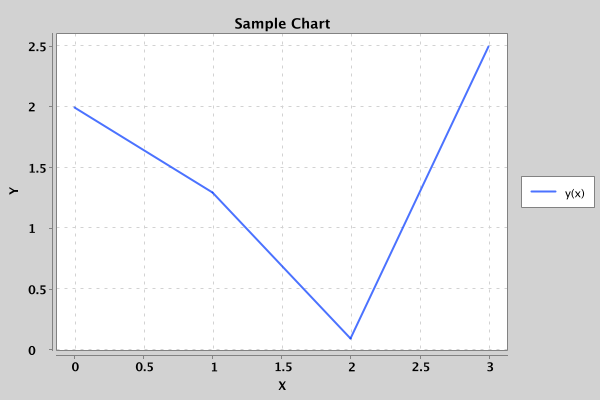

In [14]:
double[] xData = new double[] { 0.0, 1.0, 2.0, 3.0 };
double[] yData = new double[] { 2.0, 1.3, 0.1, 2.5 };

XYChart chart = QuickChart.getChart("Sample Chart", "X", "Y", "y(x)", xData, yData);
// Render the chart
BitmapEncoder.getBufferedImage(chart);